#### ベイジアン・ゲームの例: 相手のタイプに不確定性があるババ抜き
- 二人のプレイヤーがババ抜きをしていて，残りのカードが3枚になったとする。
- 直前の手番でプレイヤー1がババ（ジョーカー）を引き，プレイヤー1がカードを2枚，
  プレイヤー2がカードを1枚持っている。 
- プレイヤー1 の行動 $a_1$ の値は L (左にババを置く)，または R (右にババを置く)
- プレイヤー2 の行動 $a_2$ の値は L (左のカードをとる)，または R (右のカードをとる)
- 各プレイヤーの認識タイプの値として以下の2種類を想定する。
    - I:  やる気がある (interested)  
    - B:  やる気がない (bored) 
- 各プレイヤーの認識タイプ $\theta_i \in \{I, B\}$ は所定の確率分布 
    $P(\theta) = P(\theta_1, \theta_2) $ に従って決まる  
  ( $\theta_1, \theta_2$ は独立とは限らない)

- 各プレイヤーの混合戦略の確率分布は $s_i(a_i \mid \theta_i)$ とする。
- 以下では，プレイヤー1の事前期待効用 (ex ante expected utility) の計算を次の二つの方針で行い，比較する。
  - モデル (母集団 (population) の確率分布の式) に基づく期待効用を以下の定義式によって計算する。
    (`pop_ex_ante_exp_util1`)
    $$
    EU_i(s) = 
    \sum_{\theta \in \Theta} P(\theta) \sum_{a \in A}
    \left( \prod_{j \in N} s_j(a_j \mid \theta_j) \right) u_i(a, \theta)
    $$
  - $P(\theta)$, $s_i(a_i \mid \theta_i)$ で表される確率分布の標本(sample)から期待効用の推定値を計算する  
    (`smp_exp_util1_data`)

ex ante expected util. EU_1(s) (population) =  -0.25


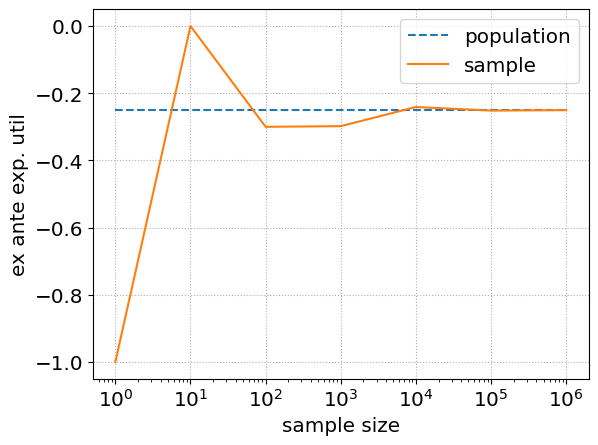

In [16]:
import numpy as np
import itertools as it
from scipy.stats import rv_discrete
import matplotlib.pyplot as plt
import matplotlib as mpl 
from math import fsum

# mpl.style.use('grayscale') 
mpl.style.use('default') 
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'x-large' #'large'
plt.rcParams['xtick.labelsize'] = 'x-large' #'large'
plt.rcParams['axes.labelsize'] = 'x-large' #'large'
plt.rcParams['axes.titlesize'] = 'x-large' #'large'
plt.rcParams['legend.fontsize'] = 'x-large' #'large'

# Dictionary of utilities of player 1 and 2
# (u1(a1, a2, theta1, theta2), u2(a1, a2, theta1, theta2))
dict_util = {('L', 'L', 'I', 'I'): ( 0,  0),
             ('L', 'L', 'I', 'B'): ( 0, -1),
             ('L', 'L', 'B', 'I'): (-1,  0),
             ('L', 'L', 'B', 'B'): (-1, -1),
             ('L', 'R', 'I', 'I'): (-1,  1),
             ('L', 'R', 'I', 'B'): (-1,  1),
             ('L', 'R', 'B', 'I'): ( 1,  1),
             ('L', 'R', 'B', 'B'): ( 1,  1),
             ('R', 'L', 'I', 'I'): (-1,  1),
             ('R', 'L', 'I', 'B'): (-1,  1),
             ('R', 'L', 'B', 'I'): ( 1,  1),
             ('R', 'L', 'B', 'B'): ( 1,  1),
             ('R', 'R', 'I', 'I'): ( 0,  0),
             ('R', 'R', 'I', 'B'): ( 0, -1),
             ('R', 'R', 'B', 'I'): (-1,  0),
             ('R', 'R', 'B', 'B'): (-1, -1)}


s1_a1_th1_I = {'L': 0.5, 'R': 0.5} # s1(a1 | theta1 = I)
s1_a1_th1_B = {'L': 0.5, 'R': 0.5} # s1(a1 | theta1 = B)

# s1(a1 | theta1)
s1_a1_th1 = {('L', 'I'): s1_a1_th1_I['L'], 
             ('R', 'I'): s1_a1_th1_I['R'], 
             ('L', 'B'): s1_a1_th1_B['L'], 
             ('R', 'B'): s1_a1_th1_B['R']}

s2_a2_th2_I = {'L': 0.5, 'R': 0.5} # s2(a2 | theta2 = I)
s2_a2_th2_B = {'L': 0.5, 'R': 0.5} # s2(a2 | theta2 = B)

# s2(a2 | theta2)
s2_a2_th2 = {('L', 'I'): s2_a2_th2_I['L'], 
             ('R', 'I'): s2_a2_th2_I['R'], 
             ('L', 'B'): s2_a2_th2_B['L'], 
             ('R', 'B'): s2_a2_th2_B['R']}

# P(theta1, theta2)
if False:
    p_th1_th2 = {('I', 'I'): 0.1,
                 ('I', 'B'): 0.2,
                 ('B', 'I'): 0.3,
                 ('B', 'B'): 0.4,}
else:
    p_th1_th2 = {('I', 'I'): 0.25,
                 ('I', 'B'): 0.25,
                 ('B', 'I'): 0.25,
                 ('B', 'B'): 0.25}

act1 = s1_a1_th1_I.keys()
act2 = s2_a2_th2_I.keys()
u1 = lambda *k: dict_util[k][0]

# population expected value 
pop_ex_ante_exp_util1 = (
    fsum(p_th1_th2[th1, th2]
        *fsum(s1_a1_th1[a1, th1]*s2_a2_th2[a2, th2]*u1(a1, a2, th1, th2) 
                for a1, a2 in it.product(act1, act2))
            for th1, th2 in p_th1_th2.keys()))

print('ex ante expected util. EU_1(s) (population) = ', pop_ex_ante_exp_util1)

def make_rand_var(dist_dict):
    return rv_discrete(values=(np.arange(len(dist_dict)), list(dist_dict.values())))

def make_rv_vals_arr(dist_dict):
    return np.array(tuple(dist_dict.keys()))

rv_p_th1_th2 = make_rand_var(p_th1_th2)
va_p_th1_th2 = make_rv_vals_arr(p_th1_th2) # (I, I), (I, B), (B, I), (B, B)

rv_s1_a1_th1_I = make_rand_var(s1_a1_th1_I)
va_s1_a1_th1_I = make_rv_vals_arr(s1_a1_th1_I) # (L, R)

rv_s1_a1_th1_B = make_rand_var(s1_a1_th1_B)
va_s1_a1_th1_B = make_rv_vals_arr(s1_a1_th1_B) # (L, R)

rv_s2_a2_th2_I = make_rand_var(s2_a2_th2_I)
va_s2_a2_th2_I = make_rv_vals_arr(s2_a2_th2_I) # (L, R)

rv_s2_a2_th2_B = make_rand_var(s2_a2_th2_B)
va_s2_a2_th2_B = make_rv_vals_arr(s2_a2_th2_B) # (L, R)


smp_exp_util1_data = []
arr_smp_sz = 10**np.arange(7) # 標本のサイズの配列

for sz in arr_smp_sz:
    type_smp_idx = rv_p_th1_th2.rvs(size=sz)
    type_sample = va_p_th1_th2[type_smp_idx] 

    # 0x00: (I, I), 0x01: (I, B), 0x02: (B, I), 0x03: (B, B)
    type_smp_idx_th1 = (0x02 & type_smp_idx) >> 1
    type_smp_idx_th2 = 0x01 & type_smp_idx

    act_smp_th1 = (va_s1_a1_th1_I[rv_s1_a1_th1_I.rvs(size=sz)],
                   va_s1_a1_th1_B[rv_s1_a1_th1_B.rvs(size=sz)])

    act_smp_th2 = (va_s2_a2_th2_I[rv_s2_a2_th2_I.rvs(size=sz)],
                   va_s2_a2_th2_B[rv_s2_a2_th2_B.rvs(size=sz)])

    a1_a2_th1_th2 = (it.chain(a1, a2, th1_th2) for a1, a2, th1_th2 
                        in zip(type_smp_idx_th1.choose(act_smp_th1), 
                               type_smp_idx_th2.choose(act_smp_th2), 
                               type_sample))


    u1_sample = [u1(*s) for s in a1_a2_th1_th2]
    smp_exp_util1_data.append(np.mean(u1_sample))


plt.plot(arr_smp_sz, np.full_like(smp_exp_util1_data, pop_ex_ante_exp_util1), linestyle='dashed')
plt.plot(arr_smp_sz, smp_exp_util1_data) 
plt.legend(('population', 'sample'))

plt.xlabel('sample size')
plt.ylabel('ex ante exp. util')
ax = plt.gca()
ax.set_xscale('log')
plt.grid(linestyle=':')
plt.savefig('ex_ante_exp_util_baba_nuki.pdf', bbox_inches='tight')
plt.show()

##### 解説
- 以下の解説のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。

[`rv_discrete`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) 
で任意の離散型の確率分布を表現できる。`rv_discrete` のキーワード引数 `values=(xk, pk)` について，
`xk` は整数のシーケンス，`pk` は float のシーケンスであり，対応する分布の
確率変数は $X \in \{x_0, x_1, \ldots, x_{n-1}\}$ となり，確率質量関数は $P(X = x_k) = p_k$ となる。
ただし，$0 \leq p_k \leq 1$ かつ $\displaystyle \sum_{k=0}^{n-1} p_k = 1$ となるように $p_k$ を設定する必要がある。


array([789, 789, 789, 789, 789, 123])


Text(0, 0.5, 'Frequency')

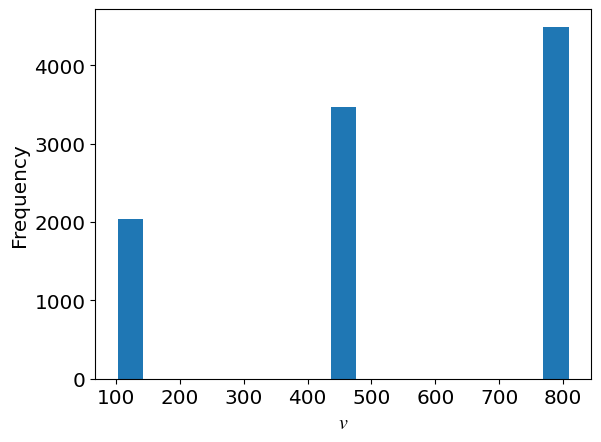

In [17]:
x0 = 123
x1 = 456
x2 = 789
p0 = 0.20 # x0 が発生する確率
p1 = 0.35 # x1 が発生する確率
p2 = 0.45 # x2 が発生する確率, 制約: p0 + p1 + p2 = 1 を満たさないと ValueError が発生
xk = (x0, x1, x2)
pk = (p0, p1, p2)
rv = rv_discrete(values=(xk, pk))
print(repr(rv.rvs(size=6)))
d = 20
ret = plt.hist(rv.rvs(size=10000), bins=(x0 - d, x0 + d, x1 - d, x1 + d, x2 - d, x2 + d))
plt.xlabel('$v$')
plt.ylabel('Frequency')

`rv_discrete` を用いれば，条件付き分布 $s_i(a_i \mid \theta_i = \text{I})$，$s_i(a_i \mid \theta_i = \text{B})$も表現できる。ただし，確率変数の値としてラベル ('L', 'R', 'I', 'B') を扱うために，辞書(dict)を併用する (`make_rand_var()`，`make_rv_vals_arr()` の実装を参照)。

なお，配列 `x` に対して [`np.count_nonzero(x)`](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html) は 評価結果が True となる `x` の要素の個数を返す。

va_s1_a1_th1_I == array(['L', 'R'], dtype='<U1')


['R' 'L' 'L' 'R' 'R'] $\sim s_1(a_1 \mid \theta_1 = \text{I})$

<BarContainer object of 2 artists>

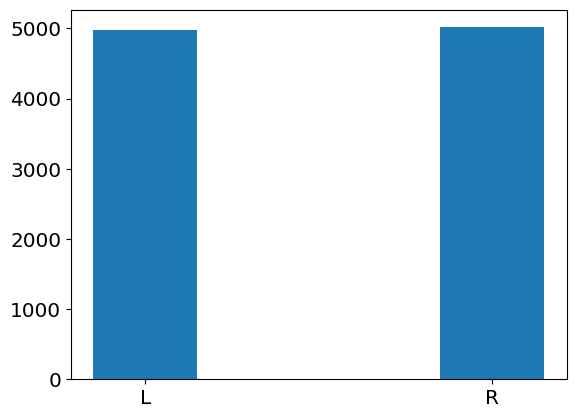

In [24]:
from IPython.display import display_markdown

s1_a1_th1_I = {'L': 0.5, 'R': 0.5}
rv_s1_a1_th1_I = make_rand_var(s1_a1_th1_I)
va_s1_a1_th1_I = make_rv_vals_arr(s1_a1_th1_I) # (L, R)

print('va_s1_a1_th1_I == ' + repr(va_s1_a1_th1_I))
display_markdown(str(va_s1_a1_th1_I[rv_s1_a1_th1_I.rvs(size=5)]) + r' $\sim s_1(a_1 \mid \theta_1 = \text{I})$', raw=True)

smp_a1_th1_I = va_s1_a1_th1_I[rv_s1_a1_th1_I.rvs(size=10000)]
n_L = np.count_nonzero(smp_a1_th1_I == 'L')
n_R = np.count_nonzero(smp_a1_th1_I == 'R')
plt.bar(np.arange(len(va_s1_a1_th1_I)),
        np.array((n_L, n_R)), 
        width=0.3,
        tick_label=va_s1_a1_th1_I)

[ndarray.choose](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.choose.html) 
は，異なる複数の配列から次のように要素を取り出して新たな配列を作る

In [19]:
import numpy as np

idx_a = np.array([0, 1, 0]) # 選択肢のインデックスの配列の例 A
idx_b = np.array([1, 0, 0]) # 選択肢のインデックスの配列の例 B

arr0 = np.array([22, 33, 44]) # インデックス0番に対応する選択肢
arr1 = np.array([55, 66, 77]) # インデックス1番に対応する選択肢

choices = (arr0, arr1) # 選択肢のシーケンス
    

# idx_a.choose(choices)) を等価な式と比較する
print(repr(idx_a.choose(choices))) 
print(choices[idx_a[0]][0], choices[idx_a[1]][1], choices[idx_a[2]][2]) 


# idx_b.choose(choices)) を等価な式と比較する
print(repr(idx_b.choose(choices))) 
print(choices[idx_b[0]][0], choices[idx_b[1]][1], choices[idx_b[2]][2]) 

array([22, 66, 44])
22 66 44
array([55, 33, 44])
55 33 44


上記の choose の機能により， `type_smp_idx_th1.choose(act_smp_th1)` は確率分布
$s_1(a_1 \mid \theta_1) P(\theta_1)$ に従う $a_1$ の標本値の配列を作る。
ここで `type_smp_idx_th1` は $P(\theta_1)$ に従う $\theta_1$ の標本値の配列である
(ただし，choose を使う都合上，I $\rightarrow$ 0，B $\rightarrow$ 1 と変換している)。
また，
```python
    act_smp_th1 = (va_s1_a1_th1_I[rv_s1_a1_th1_I.rvs(size=sz)],
                   va_s1_a1_th1_B[rv_s1_a1_th1_B.rvs(size=sz)])
```
の右辺について，次の対応関係がある。
- `va_s1_a1_th1_I[rv_s1_a1_th1_I.rvs(size=sz)]` は $s_1(a_1 \mid \theta_1 = \text{I})$ に従う $a_1$ の標本値の配列
- `va_s1_a1_th1_B[rv_s1_a1_th1_B.rvs(size=sz)]` は $s_1(a_1 \mid \theta_1 = \text{B})$ に従う $a_1$ の標本値の配列

In [20]:
from IPython.display import display_markdown
sz = 5
print('va_p_th1_th2 == \n', repr(va_p_th1_th2))

type_smp_idx = rv_p_th1_th2.rvs(size=sz)
print('type_smp_idx == ', str(type_smp_idx))
with np.printoptions(formatter={'int': lambda x: f'{x:02b}'}):
    print('type_smp_idx == ', str(type_smp_idx), ' (in binary)')


type_sample = va_p_th1_th2[type_smp_idx] 

act_smp_th1 = (va_s1_a1_th1_I[rv_s1_a1_th1_I.rvs(size=sz)],
               va_s1_a1_th1_B[rv_s1_a1_th1_B.rvs(size=sz)])

# 0x00: (I, I), 0x01: (I, B), 0x02: (B, I), 0x03: (B, B)
type_smp_idx_th1 = (0x02 & type_smp_idx) >> 1

md_txt = '  \n'.join((
    'type_sample[:, 0] == ' + str(type_sample[:, 0]) + r' $\sim P(\theta_1)$',
    'type_smp_idx_th1 == ' + str(type_smp_idx_th1) + r' $\cdots\cdots$ ' + 'mapping: ' + r'I $\rightarrow$ 0, &ensp; B $\rightarrow$ 1',
    'act_smp_th1[0] == ' + str(act_smp_th1[0]) + r' $\sim s_1(a_1 \mid \theta_1 = \text{I})$',
    'act_smp_th1[1] == ' + str(act_smp_th1[1]) + r' $\sim s_1(a_1 \mid \theta_1 = \text{B})$',
    'type_smp_idx_th1.choose(act_smp_th1) == ' + str(type_smp_idx_th1.choose(act_smp_th1)) + r' $\sim s_1(a_1 \mid \theta_1) P(\theta_1)$'
    ))

display_markdown(md_txt, raw=True)

va_p_th1_th2 == 
 array([['I', 'I'],
       ['I', 'B'],
       ['B', 'I'],
       ['B', 'B']], dtype='<U1')
type_smp_idx ==  [0 3 2 0 3]
type_smp_idx ==  [00 11 10 00 11]  (in binary)


type_sample[:, 0] == ['I' 'B' 'B' 'I' 'B'] $\sim P(\theta_1)$  
type_smp_idx_th1 == [0 1 1 0 1] $\cdots\cdots$ mapping: I $\rightarrow$ 0, &ensp; B $\rightarrow$ 1  
act_smp_th1[0] == ['L' 'L' 'R' 'R' 'L'] $\sim s_1(a_1 \mid \theta_1 = \text{I})$  
act_smp_th1[1] == ['R' 'R' 'R' 'L' 'L'] $\sim s_1(a_1 \mid \theta_1 = \text{B})$  
type_smp_idx_th1.choose(act_smp_th1) == ['L' 'R' 'R' 'R' 'L'] $\sim s_1(a_1 \mid \theta_1) P(\theta_1)$

numpy.ndarray に対するビット演算は要素ごとのビット演算となる

In [21]:
x = np.arange(4)
y = x >> 1
z = x & 0x02 
with np.printoptions(formatter={'int': lambda x: f'{x:02b}'}):
    print('x == ', str(x), ' (in binary)')
    print('y == ', str(y), ' (in binary)')
    print('z == ', str(z), ' (in binary)')

x ==  [00 01 10 11]  (in binary)
y ==  [00 00 01 01]  (in binary)
z ==  [00 00 10 10]  (in binary)


def f(*x) で任意の個数の引数を受け入れる関数を定義できる。

最初のセルの効用関数の定義
```Python
    u1 = lambda *k: dict_util[k][0]
```
の `*k` も同様に，任意の個数の引数を意味する。

In [22]:
def f(*x):
    print(type(x))
    return sum(x)

print(f(1))
print(f(1, 2))
print(f(1, 2, 3))
print(f(1, 2, 3, 4))

t = (1, 2, 3, 4)
print(f(*t))

<class 'tuple'>
1
<class 'tuple'>
3
<class 'tuple'>
6
<class 'tuple'>
10
<class 'tuple'>
10


[`itertools.chain()`](https://docs.python.org/ja/3/library/itertools.html#itertools.chain) 
は複数のシーケンス(iterable)を一つなぎのシーケンスにまとめる

In [23]:
import itertools as it
print(tuple(it.chain((1,), (2,), (3, 4), (5, 6, 7))))

(1, 2, 3, 4, 5, 6, 7)
